# Model v0.3 
Weighted Average Model Used
Feature Scaled 
ML Models 

In [148]:
# Library Import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Imputer

# import the train test split
from sklearn.model_selection import train_test_split

In [149]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/siddharthbhaduri/Desktop/Work/Fall-2017/Google-Project/Week6


In [150]:
df = pd.read_csv('input_model_weighted_average.csv')
df.head()
df.iloc[168:172]

,Unnamed: 0,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_HIGH,VIS_AVG,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM
168,168,2000,JAN,60.098523,24.919939,-5.750129,50.876803,18.079444,-19.152746,100.000000,...,11.091680,8.231682,0.061922,28.491682,9.674976,0.769395,4.527847,7.865567,3.129778,0.388589
169,169,2000,FEB,53.769218,31.870521,5.378496,44.864486,25.930720,-0.570920,100.000000,...,11.091680,7.687676,0.044134,28.925880,9.571381,287.022956,3.572751,4.803434,2.284139,0.385381
170,170,2000,MAY,84.325735,62.360525,37.698853,68.870647,51.653895,25.975416,98.988685,...,11.091680,8.828890,0.570830,30.201699,9.129810,4.098408,10.428558,0.000000,1.610892,4.896486
171,171,2000,JUN,88.622913,69.307943,52.228400,71.995094,60.166479,45.635832,99.068140,...,11.229015,9.513896,0.408795,27.953090,8.176592,3.466575,9.051719,0.000000,1.014093,4.340215


In [151]:
p_update = pd.read_csv('IL_Corn_Price_Updated_1986_2016.csv')
p_update['Period'] = pd.Categorical(p_update['Period'], ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

p_update['Discounted_Value'] = p_update['Value'] /1.000248 
#ps
#Risk-free rate for 1986 - 2016 : 9.34% ( 30-year Treasury Constant Maturity Rate at 1986 )
# Monthly discount rate = 1/1.000248 

p_update = p_update[['Year', 'Period','Value', 'Discounted_Value']]
price_updated = p_update.dropna(axis=0, how='any')
#price_updated = p_update[p_update.Period != 'MARKETING YEAR']

price_updated = price_updated.sort_values(['Year', 'Period'])
price_updated = price_updated.reset_index(drop=True)
#price_updated.iloc[168:174]

price_updated = price_updated[~((price_updated.Year == 2000) & ((price_updated.Period == 'MAR') | (price_updated.Period == 'APR')))]
price_updated.iloc[168:172]                   


,Year,Period,Value,Discounted_Value
168,2000,JAN,1.97,1.969512
169,2000,FEB,2.03,2.029497
172,2000,MAY,2.20,2.199455
173,2000,JUN,1.89,1.889531


In [152]:
#print (ps)
df['Price'] = price_updated['Value']
df['Discounted_Price'] = price_updated['Discounted_Value']
df['State'] = 'IL'

# Reorder State Column
cols = df.columns.tolist()
#cols

cols.insert(1, cols.pop(cols.index('State')))

df = df.reindex(columns = cols)
df.drop('Unnamed: 0', axis=1, inplace=True)
df



,State,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,Price,Discounted_Price
0,IL,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,IL,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,99.510367,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,IL,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,99.138166,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,IL,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,IL,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,95.246992,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393
5,IL,1986,JUN,93.180721,71.263159,47.746898,67.021368,55.502022,33.450048,92.041052,...,0.950015,25.666101,8.317023,10.598875,8.135348,0.000000,12.649299,4.995009,2.45,2.449393
6,IL,1986,JUL,93.651100,75.325134,57.224505,71.740380,60.440695,41.882198,91.024753,...,0.360831,30.924584,7.668664,11.201697,9.899297,0.000000,12.561325,6.286502,2.04,2.039494
7,IL,1986,AUG,88.032940,68.355756,43.240501,70.470204,53.535626,34.387899,97.288101,...,0.123844,23.558382,6.839216,1.162475,6.987723,0.000000,11.848591,1.872076,1.77,1.769561
8,IL,1986,SEP,86.350515,66.418060,39.848014,66.092621,53.110278,30.557896,92.975847,...,0.061922,31.473925,7.953490,6.651649,12.019534,0.109089,13.926898,5.663013,1.52,1.519623
9,IL,1986,OCT,74.910045,52.914618,29.721084,61.366736,42.196248,24.559025,98.802348,...,0.103207,25.729013,7.975400,10.803140,9.754228,0.327268,16.250392,1.152677,1.39,1.389655


In [146]:
c_names = list(df.columns.values)
X = df.iloc[:].values
imputer = Imputer(missing_values='NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:,3:25]) 
X[:,3:25] = imputer.transform(X[:,3:25])

labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,1] = labelencoder_X.fit_transform(X[:,1])
X[:,2] = labelencoder_X.fit_transform(X[:,2])

sc_X = StandardScaler()
X[:,3:25] = sc_X.fit_transform(X[:,3:25] )
w_avg_model_scaled = pd.DataFrame(X)
w_avg_model_scaled.columns = c_names

w_avg_model_scaled



//anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,State,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,Price,Discounted_Price
0,0,0,4,-1.45675,-1.36316,-1.44742,-1.70231,-1.31571,-1.1956,0.235084,...,-0.289188,-0.217937,1.60299,-0.0992728,-1.94272,1.32164,0.767302,-1.18103,2.35,2.34942
1,0,0,3,-1.60491,-1.29749,-1.27834,-1.35352,-1.05713,-0.99947,0.500788,...,-0.583835,-1.29053,0.716991,-0.0992602,-0.890693,1.76687,1.83942,-0.904607,2.38,2.37941
2,0,0,7,0.0645888,-0.518917,-0.590116,-0.908331,-0.672195,-0.637439,0.296276,...,1.40889,1.25864,2.37743,-0.0991246,-0.740312,0.316776,0.803133,-0.738006,2.35,2.34942
3,0,0,0,0.623882,0.130331,-0.0107628,-0.0435502,-0.203651,-0.204647,0.527439,...,0.801964,-0.366471,1.41578,-0.099096,0.416512,-0.199027,0.358461,-0.316855,2.34,2.33942
4,0,0,8,0.607358,0.683899,0.559696,0.0702732,0.481334,0.604069,-1.8418,...,0.0676153,0.538949,0.327921,-0.0991237,0.563871,-0.640773,1.63627,0.7767,2.45,2.44939
5,0,0,6,1.15138,1.21006,1.12481,0.599897,0.999388,0.884365,-3.60335,...,2.60797,-1.07547,-0.0782098,-0.0991704,0.0405702,-0.729266,1.34123,0.915893,2.45,2.44939
6,0,0,5,1.18433,1.44954,1.60539,1.04992,1.32137,1.30233,-4.16178,...,0.37167,0.0707466,-0.473037,-0.0991643,0.666342,-0.729266,1.32407,1.45807,2.04,2.03949
7,0,0,1,0.790723,1.03865,0.896307,0.928794,0.871187,0.930852,-0.720274,...,-0.527832,-1.5349,-0.978141,-0.0992659,-0.366557,-0.729266,1.18504,-0.395125,1.77,1.76956
8,0,0,11,0.672853,0.924406,0.724285,0.511327,0.843456,0.741008,-3.08971,...,-0.762862,0.190489,-0.299588,-0.0992103,1.41851,-0.699768,1.59044,1.19632,1.52,1.51962
9,0,0,10,-0.128665,0.128287,0.210783,0.060645,0.131905,0.443657,0.111754,...,-0.606161,-1.06176,-0.286246,-0.0991683,0.614878,-0.640773,2.04367,-0.697132,1.39,1.38966


In [147]:
# List to store results
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = []

# Making all column names UPPER CASE --> inline with the weather data file
w_avg_model_scaled.columns = map(str.upper, w_avg_model_scaled.columns)

# rename UNNAMED:0 to INDEX
#input_data.rename(columns={'UNNAMED: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
#input_data = input_data.drop('INDEX', axis=1)

w_avg_model_scaled.head()

,STATE,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,PRICE,DISCOUNTED_PRICE
0,0,0,4,-1.45675,-1.36316,-1.44742,-1.70231,-1.31571,-1.1956,0.235084,...,-0.289188,-0.217937,1.60299,-0.0992728,-1.94272,1.32164,0.767302,-1.18103,2.35,2.34942
1,0,0,3,-1.60491,-1.29749,-1.27834,-1.35352,-1.05713,-0.99947,0.500788,...,-0.583835,-1.29053,0.716991,-0.0992602,-0.890693,1.76687,1.83942,-0.904607,2.38,2.37941
2,0,0,7,0.0645888,-0.518917,-0.590116,-0.908331,-0.672195,-0.637439,0.296276,...,1.40889,1.25864,2.37743,-0.0991246,-0.740312,0.316776,0.803133,-0.738006,2.35,2.34942
3,0,0,0,0.623882,0.130331,-0.0107628,-0.0435502,-0.203651,-0.204647,0.527439,...,0.801964,-0.366471,1.41578,-0.099096,0.416512,-0.199027,0.358461,-0.316855,2.34,2.33942
4,0,0,8,0.607358,0.683899,0.559696,0.0702732,0.481334,0.604069,-1.8418,...,0.0676153,0.538949,0.327921,-0.0991237,0.563871,-0.640773,1.63627,0.7767,2.45,2.44939


In [184]:
# List of column names

col_names = list(w_avg_model_scaled)

# List all column types
#input_data.dtypes
print("Shape of Original data: {}".format(w_avg_model_scaled.shape) + "\n")

input_variables = w_avg_model_scaled.iloc[:,3:26]
print("Variables: " + str(input_variables.columns) + "\n")
print("Shape of variable data: {}".format(input_variables.shape) + "\n")

#print(input_data.iloc[:,26])
price = w_avg_model_scaled.iloc[:,25]
discounted_price = w_avg_model_scaled.iloc[:,26]

Shape of Original data: (370, 27)

Variables: Index(['TMP_HIGH', 'TMP_AVG', 'TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW',
       'HUM_HIGH', 'HUM_AVG', 'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG',
       'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG',
       'PRECIP', 'NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_FOG',
       'NUM_DAYS_THNDRSTRM', 'PRICE'],
      dtype='object')

Shape of variable data: (370, 23)



In [185]:
print(w_avg_model_scaled.columns)

Index(['STATE', 'YEAR', 'MONTH', 'TMP_HIGH', 'TMP_AVG', 'TMP_LOW', 'DP_HIGH',
       'DP_AVG', 'DP_LOW', 'HUM_HIGH', 'HUM_AVG', 'HUM_LOW', 'SEALVL_HIGH',
       'SEALVL_AVG', 'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG', 'VIS_LOW',
       'WIND_HIGH', 'WIND_AVG', 'PRECIP', 'NUMDAY_RAIN', 'NUM_DAYS_SNOW',
       'NUM_DAYS_FOG', 'NUM_DAYS_THNDRSTRM', 'PRICE', 'DISCOUNTED_PRICE'],
      dtype='object')


# Linear Regression

# Visualizing the important characteristics¶

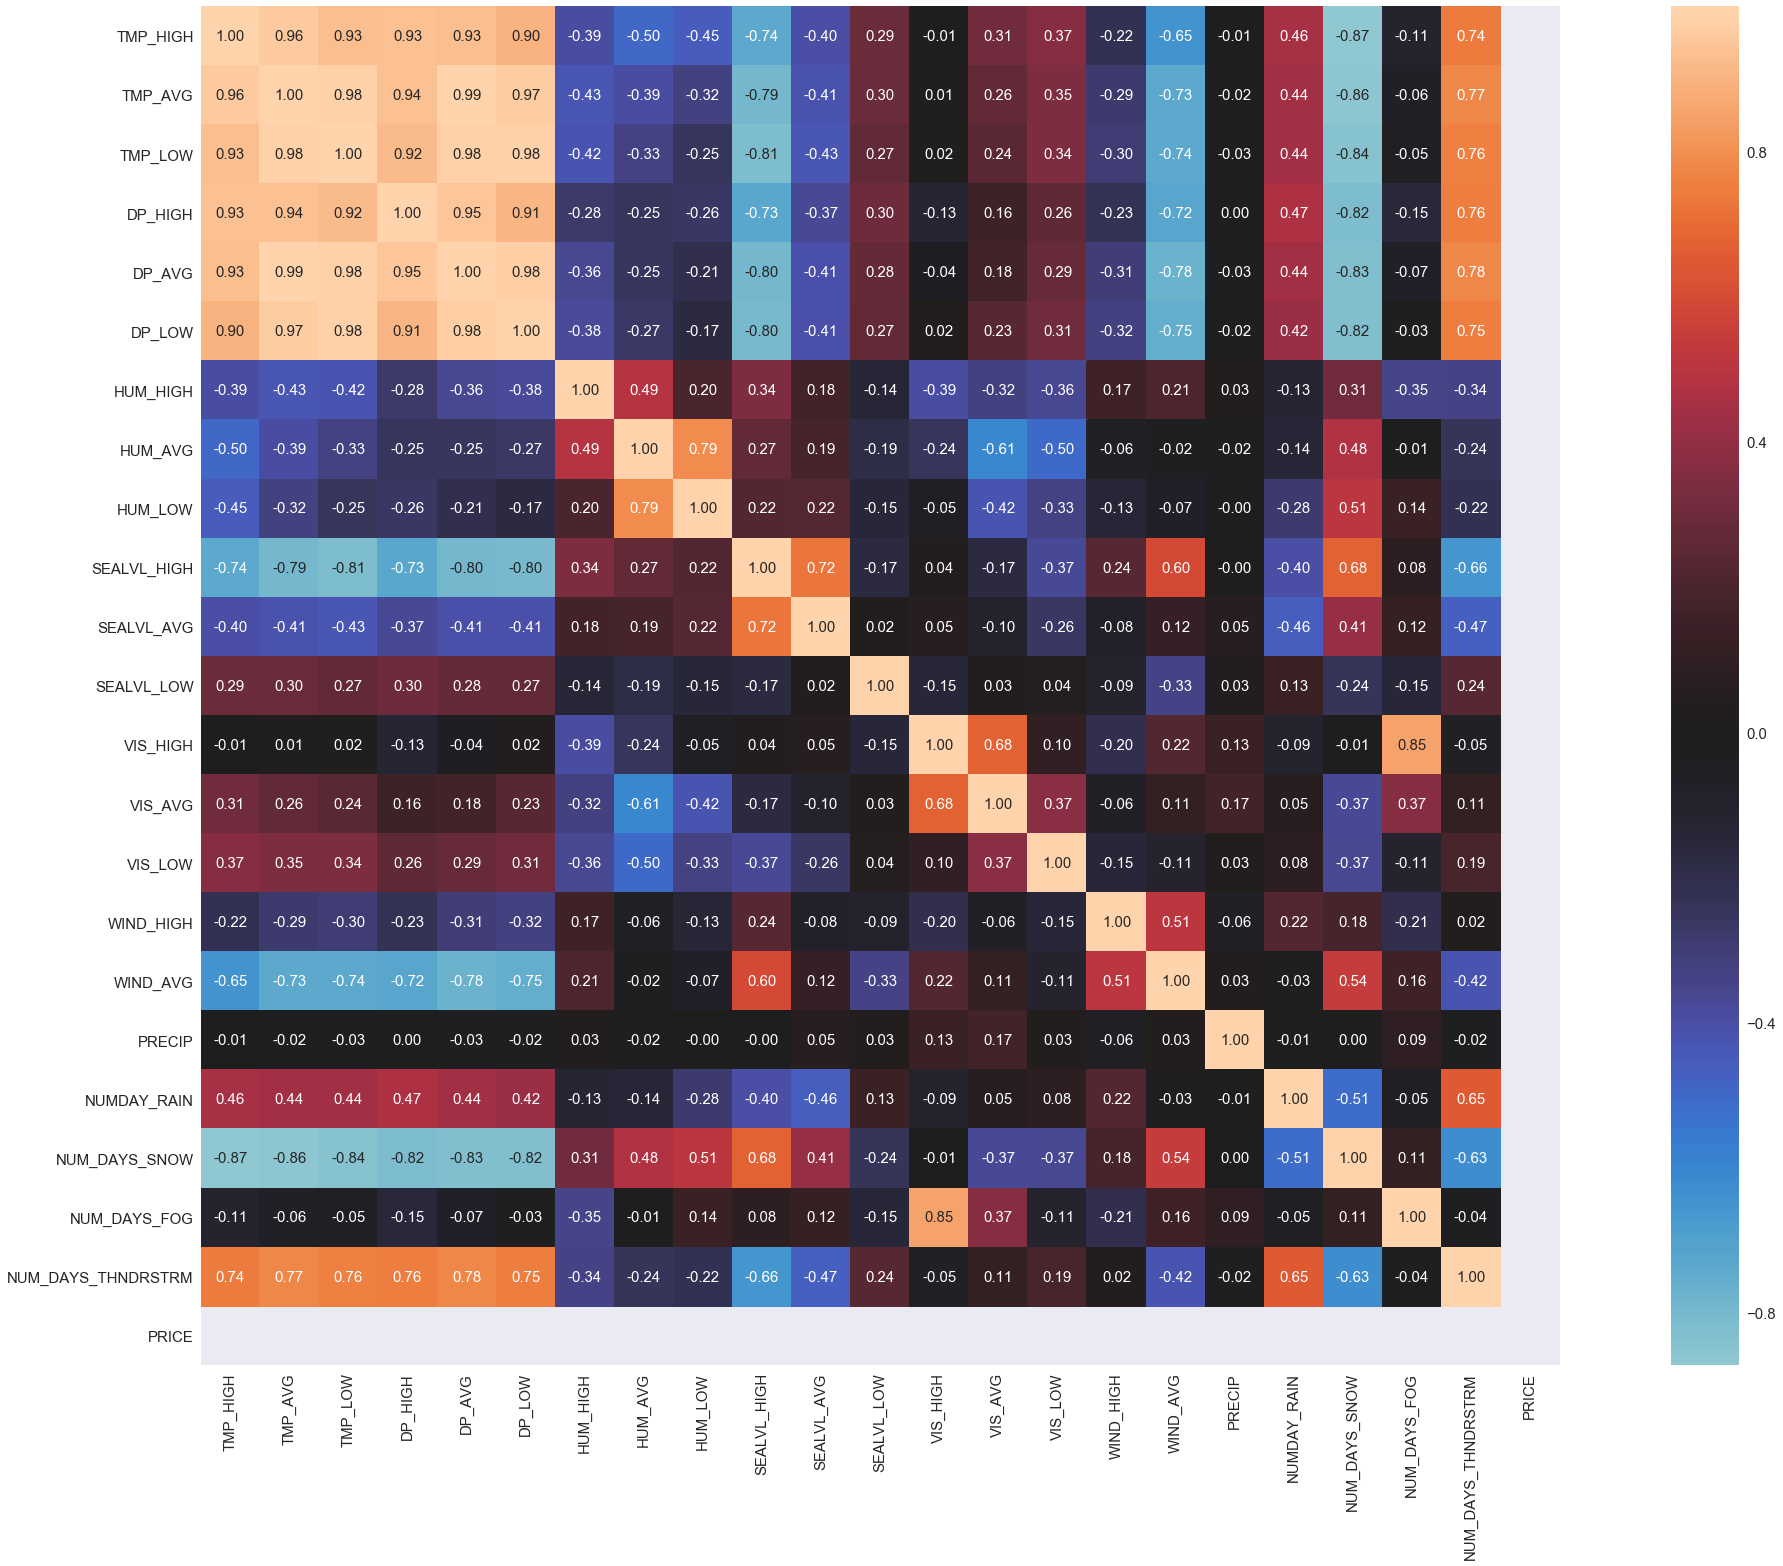

In [190]:
# Plot the correlation matrix 
correlation_matrix = np.corrcoef(input_variables.values.T.astype(float))
heat_map_column_names = col_names = list(input_variables)
sns.set(font_scale = 1.5)
plt.figure(figsize = (40,25))
hm = sns.heatmap(correlation_matrix,
    cbar=True,
    annot=True,
    center = 0,             
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=heat_map_column_names,
    xticklabels=heat_map_column_names)
plt.show()


In [191]:
# Splitting Data into Training and Test
X_train, X_test, y_train, y_test = train_test_split(input_variables.iloc[:,0:22], price, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(296, 22) (296,)
(74, 22) (74,)


# Simple Linear Regression

In [193]:
# regression libraries
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_{}: ".format(lr.coef_))
print("\n" + "lr_intercept_{}".format(lr.intercept_))

ValueError: array must not contain infs or NaNs